In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploring data

In [199]:
df = pd.read_csv("cardio_train.csv")

In [200]:
df.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,988;22469;1;155;69.0;130;80;2;2;0;0;1;0
1,989;14648;1;163;71.0;110;70;1;1;0;0;1;1
2,990;21901;1;165;70.0;120;80;1;1;0;0;1;0
3,991;14549;2;165;85.0;120;80;1;1;1;1;1;0
4,992;23393;1;155;62.0;120;80;1;1;0;0;1;0


### Splitting columns & Dropping id column

In [201]:
df[["id","age","gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active","cardio"]] = df["id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio"].str.split(";", expand =True)
df.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988;22469;1;155;69.0;130;80;2;2;0;0;1;0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989;14648;1;163;71.0;110;70;1;1;0;0;1;1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990;21901;1;165;70.0;120;80;1;1;0;0;1;0,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991;14549;2;165;85.0;120;80;1;1;1;1;1;0,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992;23393;1;155;62.0;120;80;1;1;0;0;1;0,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [202]:
df.drop('id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio', inplace=True, axis=1)

In [203]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


### Dropping id column as it's not important

In [204]:
df = df.drop("id" , axis=1)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          69301 non-null  object
 1   gender       69301 non-null  object
 2   height       69301 non-null  object
 3   weight       69301 non-null  object
 4   ap_hi        69301 non-null  object
 5   ap_lo        69301 non-null  object
 6   cholesterol  69301 non-null  object
 7   gluc         69301 non-null  object
 8   smoke        69301 non-null  object
 9   alco         69301 non-null  object
 10  active       69301 non-null  object
 11  cardio       69301 non-null  object
dtypes: object(12)
memory usage: 6.3+ MB


### Converting data from categorical to numeric

In [206]:
columns = ["age","gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active","cardio"]
for i in columns:
    df[i] = pd.to_numeric(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  int64  
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   ap_hi        69301 non-null  int64  
 5   ap_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   gluc         69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alco         69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  cardio       69301 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.3 MB


### Checking nulls and duplicates and dropping them 

In [207]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [208]:
df.duplicated().sum()

24

In [209]:
df.drop_duplicates(inplace=True)

In [210]:
df.duplicated().sum()

0

### Checking the Target Column

In [211]:
df["cardio"].unique()

array([0, 1], dtype=int64)

In [212]:
df[(df["cardio"]>1)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [213]:
#df.drop(df.index[(df["cardio"]>1)], inplace=True)

In [214]:
#df[(df["cardio"]>1)]

### Checking for outliers

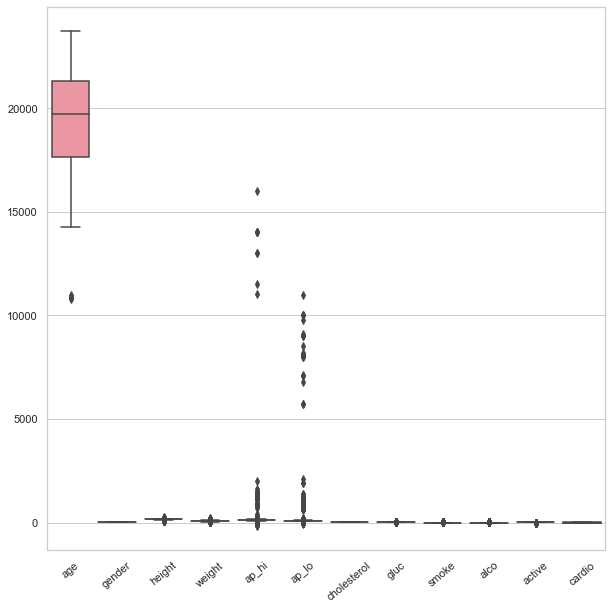

In [215]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df)
plt.xticks(rotation=40)
plt.show()

### Comparing people with and without cardio vascular disease 

### converting age column from days to years

In [216]:
df["age"] = (df["age"] / 365.25).round(0)

In [217]:
df["age"] = pd.to_numeric(df["age"], downcast="integer")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,62,1,155,69.0,130,80,2,2,0,0,1,0
1,40,1,163,71.0,110,70,1,1,0,0,1,1
2,60,1,165,70.0,120,80,1,1,0,0,1,0
3,40,2,165,85.0,120,80,1,1,1,1,1,0
4,64,1,155,62.0,120,80,1,1,0,0,1,0


#### Insight: People with cardivascular disease are less than people without cardio vascular disease before age of 55 years. After that age people of cardio vascular disease are more than people without this disease.

### Checking the corrolation among columns

In [218]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023200,-0.081151,0.054286,0.020357,0.017668,0.154309,0.098821,-0.047936,-0.029630,-0.009835,0.237792
gender,-0.023200,1.000000,0.499420,0.155562,0.005970,0.015383,-0.036429,-0.021221,0.337604,0.170998,0.006293,0.008519
height,-0.081151,0.499420,1.000000,0.290348,0.005493,0.006216,-0.050631,-0.018926,0.187912,0.094171,-0.005973,-0.011066
weight,0.054286,0.155562,0.290348,1.000000,0.030656,0.043638,0.141811,0.107187,0.068248,0.067217,-0.016510,0.182033
ap_hi,0.020357,0.005970,0.005493,0.030656,1.000000,0.015917,0.023563,0.011813,-0.000940,0.001380,0.000034,0.054211
ap_lo,0.017668,0.015383,0.006216,0.043638,0.015917,1.000000,0.024007,0.010883,0.004938,0.010757,0.004966,0.065288
cholesterol,0.154309,-0.036429,-0.050631,0.141811,0.023563,0.024007,1.000000,0.451702,0.010179,0.035973,0.009724,0.220723
gluc,0.098821,-0.021221,-0.018926,0.107187,0.011813,0.010883,0.451702,1.000000,-0.004651,0.011409,-0.007293,0.089022
smoke,-0.047936,0.337604,0.187912,0.068248,-0.000940,0.004938,0.010179,-0.004651,1.000000,0.339692,0.025806,-0.015273
alco,-0.029630,0.170998,0.094171,0.067217,0.001380,0.010757,0.035973,0.011409,0.339692,1.000000,0.025756,-0.007253


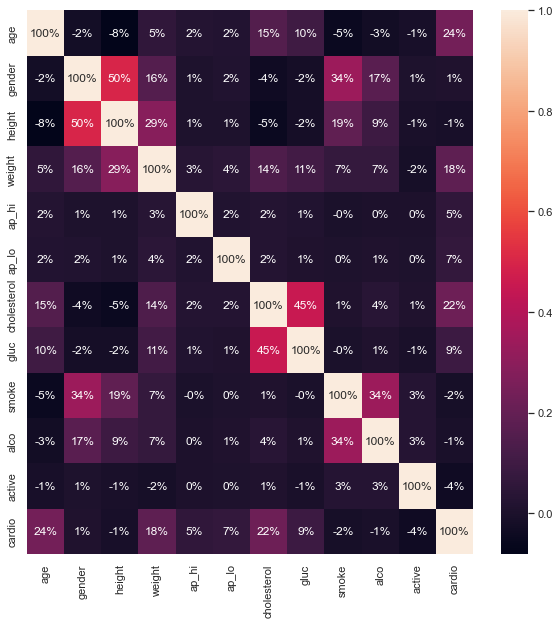

In [219]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".0%")
plt.show()

#### Insight: The highest two factors affecting cardio vascular disease are age and cholesterol then weight

# Data Cleaning

## Outliers Check

In [220]:
columns2 = ["age","height","weight", "ap_hi","ap_lo"]

D:\7agat msh bafta7ha\Anaconda Last Directory\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


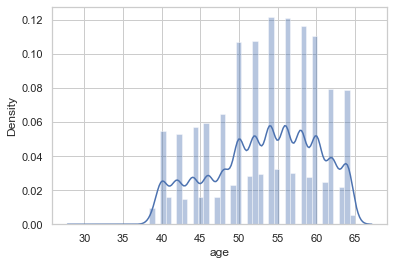

In [221]:
sns.distplot(df["age"])
plt.show()

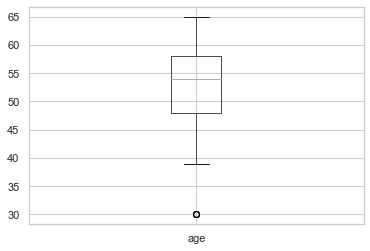

In [222]:
figure = df.boxplot(column="age")

D:\7agat msh bafta7ha\Anaconda Last Directory\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


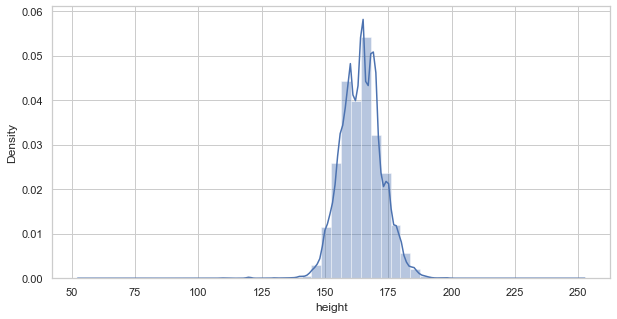

In [223]:
plt.figure(figsize=(10,5))
sns.distplot(df["height"])
plt.show()

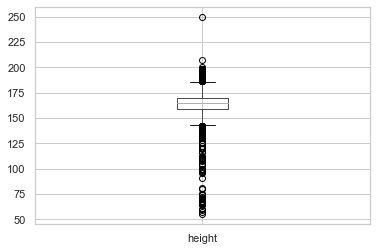

In [224]:
figure = df.boxplot(column="height")

D:\7agat msh bafta7ha\Anaconda Last Directory\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


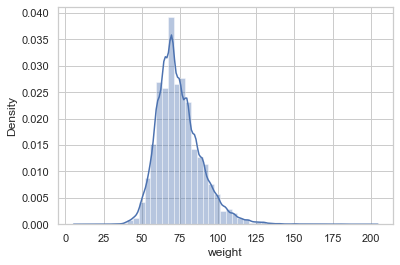

In [225]:
sns.distplot(df["weight"])
plt.show()

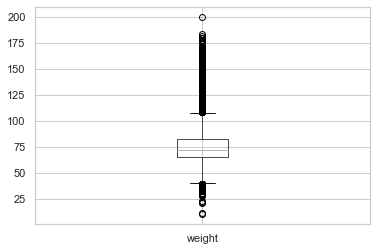

In [226]:
figure = df.boxplot(column="weight")

D:\7agat msh bafta7ha\Anaconda Last Directory\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


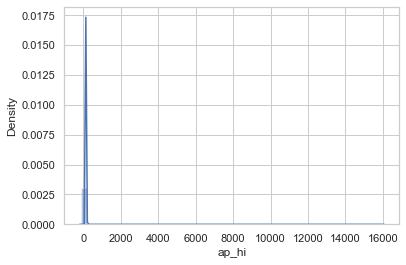

In [227]:
sns.distplot(df["ap_hi"])
plt.show()

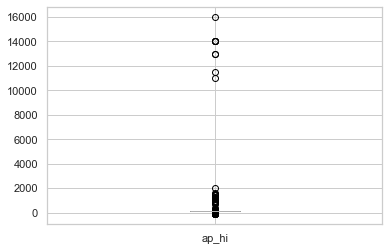

In [228]:
figure = df.boxplot(column="ap_hi")

D:\7agat msh bafta7ha\Anaconda Last Directory\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


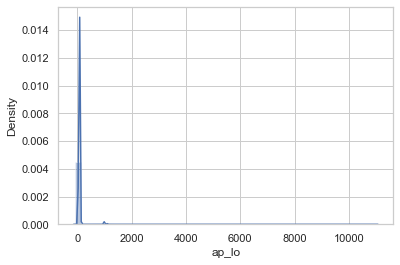

In [229]:
sns.distplot(df["ap_lo"])
plt.show()

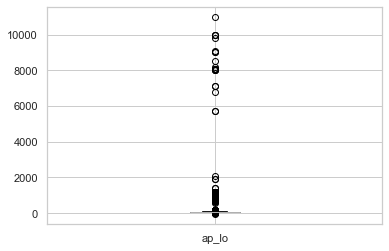

In [230]:
figure = df.boxplot(column="ap_lo")

# Dealing with outliers

## (1) Age Column

In [231]:
age_outliers = df[df["age"]<35]
age_outliers

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
5520,30,1,175,59.0,120,80,1,1,0,0,1,0
21644,30,2,175,92.0,100,60,1,1,0,0,1,0
29967,30,1,159,59.0,120,80,1,1,0,0,1,0
55206,30,1,160,59.0,110,70,1,1,0,0,1,0


In [232]:
age_mean = df["age"].mean()
age_mean

53.30282777833913

#### I think they are not affecting outliers so we can keep them

## (2) height Column

In [233]:
height_outliers = df[df["height"]>225]
height_outliers

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
5787,58,1,250,86.0,140,100,3,1,0,0,1,1


In [234]:
height_mean = df["height"].mean()
height_mean

164.3621403929154

#### I think they are not affecting outliers so we can keep them as the man's age is 58 so it is logic to be tall

## (3) weight Column

In [235]:
weight_outliers = df[df["weight"]<25]
weight_outliers

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
26107,64,1,157,23.0,110,80,1,1,0,0,1,0
28789,56,2,177,22.0,120,80,1,1,1,1,1,0
33118,59,2,178,11.0,130,90,1,1,0,0,1,1
57159,51,2,165,10.0,180,1100,2,2,0,0,1,1
59489,60,1,162,21.0,120,80,2,1,0,0,1,1


In [236]:
weight_mean = df["weight"].mean()
weight_mean

74.20588362660047

In [237]:
df.loc[df["weight"]<25,"weight"] = weight_mean

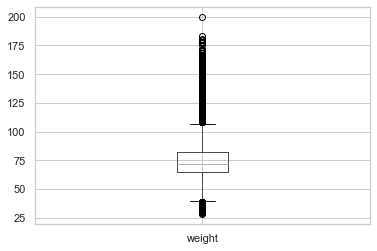

In [238]:
figure = df.boxplot(column="weight")

#### I converted adults with weight less than 25 kg to the average weight as it is impossible that an adult be less than 25 kg

## (4) Systolic blood pressure  ap_hi Column 

In [239]:
ap_hi_outliers_180 = df[(df["ap_hi"]>=180) & (df["cardio"]==1)]
ap_hi_outliers_180

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
154,58,1,166,92.0,180,110,1,1,0,0,1,1
266,54,1,155,83.0,190,90,2,2,0,0,1,1
311,42,1,163,76.0,180,100,1,1,0,0,1,1
571,52,2,175,150.0,180,120,2,1,0,1,1,1
692,57,1,158,59.0,180,90,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68888,64,1,169,101.0,180,110,1,1,0,0,0,1
68894,46,2,179,93.0,180,100,1,2,0,1,1,1
69131,62,2,163,67.0,180,100,2,1,0,0,0,1
69195,46,1,160,70.0,200,100,1,2,0,0,1,1


In [240]:
#sns.scatterplot(data = ap_hi_outliers["ap_hi"])

In [241]:
ap_hi_mean = df["ap_hi"].mean()
ap_hi_mean

128.8327872165365

In [242]:
df.loc[(df["ap_hi"]>=180) & (df["cardio"]==1),"ap_hi"] = 180

In [243]:
ap_hi_outliers_45 = df[(df["ap_hi"]<45) & (df["cardio"]==0)]
ap_hi_outliers_45

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
280,50,1,172,65.0,11,80,1,3,0,0,1,0
901,53,1,165,66.0,12,80,1,1,0,0,1,0
1073,39,2,168,64.0,11,60,1,1,1,1,1,0
1504,60,2,187,80.0,12,80,1,1,1,0,1,0
1829,42,1,163,86.0,12,80,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
67248,45,2,170,81.0,12,80,1,1,0,0,0,0
67756,60,1,165,63.0,12,80,1,1,0,0,1,0
67931,58,1,160,59.0,12,80,1,1,0,0,1,0
68299,52,1,154,77.0,14,90,1,1,0,0,1,0


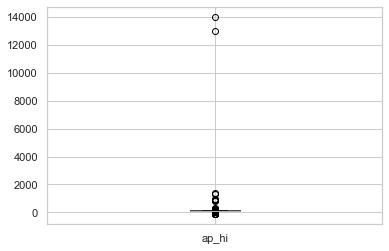

In [244]:
figure = df.boxplot(column="ap_hi")

In [245]:
df[(df["ap_hi"]>180)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
629,58,2,174,106.0,220,120,3,3,0,0,1,0
1177,41,1,160,60.0,902,60,1,1,0,0,1,0
1315,62,2,167,59.0,906,0,1,1,0,0,1,0
3077,64,2,172,90.0,200,100,2,2,0,0,0,0
3338,44,2,176,85.0,200,120,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64212,46,1,157,78.0,906,60,2,1,0,0,1,0
65645,54,2,171,59.0,200,100,1,1,1,1,1,0
67964,50,1,156,41.0,906,0,1,1,0,0,1,0
68416,56,2,177,108.0,190,90,1,3,1,1,1,0


In [246]:
ap_hi_mean = df["ap_hi"].mean()
ap_hi_mean

127.15562163488603

In [247]:
df.loc[(df["ap_hi"]>=180) & (df["cardio"]==0),"ap_hi"] = ap_hi_mean

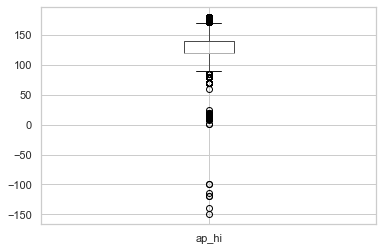

In [248]:
figure = df.boxplot(column="ap_hi")

In [249]:
df.loc[(df["ap_hi"]<45) & (df["cardio"]==0),"ap_hi"] = 45

In [250]:
ap_hi_mean = df["ap_hi"].mean()
ap_hi_mean

126.56220821155857

In [251]:
df.loc[(df["ap_hi"]<45) & (df["cardio"]==1),"ap_hi"] = ap_hi_mean

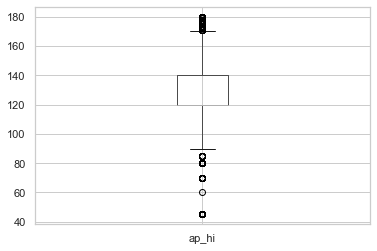

In [252]:
figure = df.boxplot(column="ap_hi")

#### I converted people with systolic blood preasure more than 180 and cardio 1 to 180, people with more than 180  and cardio 0 to the average, people with less than 45 and cardio 0  to 45 and finally people with less than 45 and cardio 1 to the average.

## (5) Dystolic blood pressure  ap_lo Column 

In [253]:
ap_lo_outliers = df[(df["ap_lo"]>120) & (df["cardio"]==1)]
ap_lo_outliers

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
20,64,2,170,74.0,140.0,1000,1,1,0,0,1,1
182,48,2,170,84.0,150.0,1100,1,1,1,0,0,1
301,58,2,168,82.0,160.0,1000,2,1,0,0,0,1
334,44,1,167,71.0,150.0,1001,2,1,0,0,1,1
375,58,2,169,76.0,140.0,1000,3,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68932,40,1,154,90.0,130.0,1000,2,2,0,0,1,1
69072,64,1,167,81.0,160.0,1000,1,1,0,0,1,1
69173,60,1,152,56.0,160.0,1000,1,1,0,0,1,1
69179,58,2,168,95.0,160.0,1000,1,1,0,0,1,1


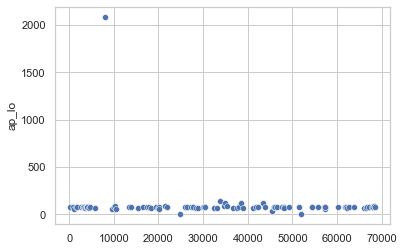

In [254]:
sns.scatterplot(data = ap_hi_outliers_45["ap_lo"])
plt.show()

In [255]:
ap_lo_mean = df["ap_lo"].mean()
ap_lo_mean

96.6560041572239

In [256]:
df.loc[(df["ap_lo"]>120) & (df["cardio"]==1),"ap_lo"] = 120

In [257]:
df[(df["ap_lo"]>120)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
880,47,2,168,63.0,150.000000,1100,1,1,1,1,1,0
1207,41,1,166,77.0,160.000000,1000,1,2,1,0,1,0
2000,62,1,158,70.0,130.000000,1000,1,2,0,0,0,0
2446,62,1,149,71.0,159.000000,1044,1,1,0,0,1,0
3466,45,2,162,76.0,140.000000,1100,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
67351,49,1,167,69.0,150.000000,709,2,1,0,0,0,0
68463,62,2,160,98.0,127.155622,1000,1,1,0,0,0,0
68621,58,2,168,63.0,120.000000,602,1,1,0,0,0,0
68853,62,2,170,68.0,130.000000,1100,1,1,0,0,1,0


In [258]:
df.loc[(df["ap_lo"]>120) & (df["cardio"]==0),"ap_lo"] = ap_lo_mean

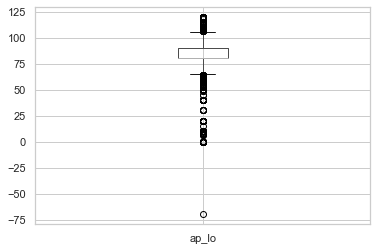

In [259]:
figure = df.boxplot(column="ap_lo")

In [260]:
ap_lo_outliers = df[(df["ap_lo"]<25) & (df["cardio"]==0)]
ap_lo_outliers

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1315,62,2,167,59.0,127.155622,0.0,1,1,0,0,1,0
6899,40,2,70,72.0,120.000000,8.0,1,1,0,0,1,0
8098,58,1,162,68.0,110.000000,20.0,1,1,0,0,1,0
12790,41,2,150,60.0,130.000000,0.0,1,1,0,0,0,0
13236,49,1,164,74.0,110.000000,20.0,1,1,0,0,1,0
16682,50,1,164,78.0,138.000000,0.0,1,1,0,0,1,0
18199,48,1,171,68.0,110.000000,7.0,1,1,0,0,1,0
18376,54,2,168,68.0,110.000000,7.0,1,1,0,0,1,0
19436,59,1,160,72.0,110.000000,20.0,2,2,0,0,0,0
22606,46,2,172,66.0,120.000000,20.0,1,1,0,0,0,0


In [261]:
df.loc[(df["ap_lo"]<25) & (df["cardio"]==0),"ap_lo"] = 25

In [262]:
df.loc[(df["ap_lo"]<25)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6038,46,1,156,61.0,150.000000,10.0,1,1,0,0,0,1
9078,60,1,166,125.0,120.000000,8.0,3,1,0,0,1,1
9407,50,1,152,50.0,150.000000,10.0,3,1,0,0,1,1
11121,50,1,169,69.0,128.000000,20.0,1,1,0,0,1,1
15760,56,1,156,50.0,138.000000,0.0,3,1,0,0,1,1
18259,48,2,170,62.0,110.000000,20.0,1,1,0,0,1,1
21681,44,2,170,66.0,120.000000,20.0,1,1,0,0,1,1
22224,58,2,166,68.0,149.000000,0.0,1,1,0,0,1,1
23168,44,1,161,92.0,180.000000,0.0,2,1,0,0,1,1
24058,56,1,168,68.0,120.000000,20.0,1,1,0,0,1,1


In [263]:
ap_lo_mean = df["ap_lo"].mean()
ap_lo_mean

81.76824817295238

In [264]:
df.loc[(df["ap_lo"]<25) & (df["cardio"]==1),"ap_lo"] = ap_lo_mean

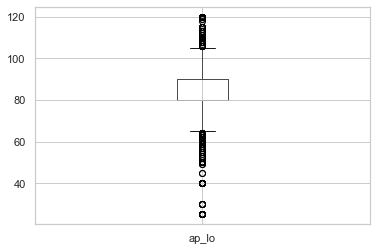

In [265]:
figure = df.boxplot(column="ap_lo")

#### I converted people with dystolic blood preasure more than 120 and cardio 1 to 120, people with more than 120  and cardio 0 to the average, people with less than 25 and cardio 0  to 25 and finally people with less than 25 and cardio 1 to the average.

# Correlation after Preprocessing the data

In [266]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023200,-0.081151,0.054503,0.206483,0.148646,0.154309,0.098821,-0.047936,-0.029630,-0.009835,0.237792
gender,-0.023200,1.000000,0.499420,0.155819,0.062020,0.066437,-0.036429,-0.021221,0.337604,0.170998,0.006293,0.008519
height,-0.081151,0.499420,1.000000,0.290643,0.018075,0.032085,-0.050631,-0.018926,0.187912,0.094171,-0.005973,-0.011066
weight,0.054503,0.155819,0.290643,1.000000,0.269929,0.249987,0.141911,0.107248,0.068383,0.067419,-0.016379,0.182214
ap_hi,0.206483,0.062020,0.018075,0.269929,1.000000,0.691604,0.192865,0.090504,0.026944,0.031209,0.002442,0.442289
ap_lo,0.148646,0.066437,0.032085,0.249987,0.691604,1.000000,0.157672,0.073562,0.026677,0.040758,0.003368,0.347925
cholesterol,0.154309,-0.036429,-0.050631,0.141911,0.192865,0.157672,1.000000,0.451702,0.010179,0.035973,0.009724,0.220723
gluc,0.098821,-0.021221,-0.018926,0.107248,0.090504,0.073562,0.451702,1.000000,-0.004651,0.011409,-0.007293,0.089022
smoke,-0.047936,0.337604,0.187912,0.068383,0.026944,0.026677,0.010179,-0.004651,1.000000,0.339692,0.025806,-0.015273
alco,-0.029630,0.170998,0.094171,0.067419,0.031209,0.040758,0.035973,0.011409,0.339692,1.000000,0.025756,-0.007253


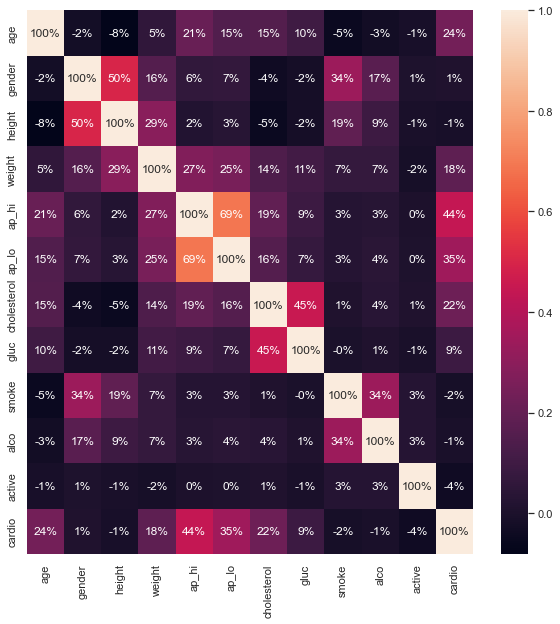

In [267]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".0%")
plt.show()

#### We notice that the correlation between diastolic and systolic preassure increased significantly

In [268]:
#df.to_csv('Cardio_Cleaned_Data.csv')

# Decision Tree Model

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=44, shuffle =True)

tree = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) 
tree.fit(X_train, y_train)

print('tree Train Score is : ' , tree.score(X_train, y_train))
print('tree Test Score  is : ' , tree.score(X_test, y_test))

y_pred = tree.predict(X_test)
print('Predicted Value for DecisionTreeClassifierModel is : \n' , y_pred[:10])
y_test[:10]

tree Train Score is :  0.7292470106646558
tree Test Score  is :  0.7232962995363486
Predicted Value for DecisionTreeClassifierModel is : 
 [1 1 1 0 0 0 0 0 0 0]


array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

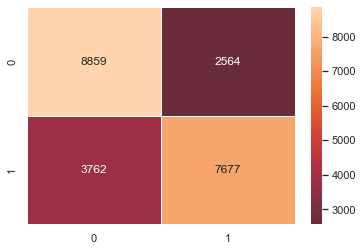

In [270]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, tree.predict(X_test))

# drawing confusion matrix
sns.heatmap(cm, center = True, annot=True, fmt="d", linewidths=.5)
plt.show()

In [271]:
print(df.columns)
print( tree.feature_importances_)

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')
[0.09147195 0.         0.         0.         0.83203775 0.00501058
 0.07147971 0.         0.         0.         0.        ]


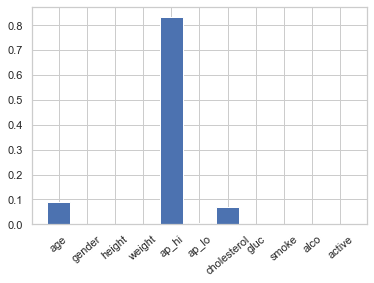

In [272]:
columns = ["age","gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active"]
importance = tree.feature_importances_
# len(columns) == len(importance)
plt.figure()
plt.bar(columns,importance)
plt.xticks(rotation = 40)
plt.show()